# Practicals - 10 : Apply VADER/TextBlob to analyze sentiments of Amazon product reviews. Visualize sentiment distribution.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip')

print(df[['Text']].head())

<ipython-input-4-386e3539bf22>:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip')


                                                Text
0  I have bought several of the Vitality canned d...
1  Product arrived labeled as Jumbo Salted Peanut...
2  This is a confection that has been around a fe...
3  If you are looking for the secret ingredient i...
4  Great taffy at a great price.  There was a wid...


In [ ]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""  # Return empty string for NaNs or non-text
    text = re.sub(r'http\S+', '', text)      # Remove URLs
    text = re.sub(r'@\w+', '', text)         # Remove mentions
    text = re.sub(r'#\w+', '', text)         # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    return text.lower()                      # Convert to lowercase

df['clean_text'] = df['Text'].apply(clean_text)


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

vader_analyzer = SentimentIntensityAnalyzer()

df['vader_scores'] = df['clean_text'].apply(lambda x: vader_analyzer.polarity_scores(x))

df['vader_compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

df['vader_sentiment'] = df['vader_compound'].apply(lambda c: 'positive' if c >= 0.05 else ('negative' if c <= -0.05 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from textblob import TextBlob

# Apply TextBlob to the cleaned text
df['textblob_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment based on polarity
df['textblob_sentiment'] = df['textblob_polarity'].apply(lambda p: 'positive' if p > 0 else ('negative' if p < 0 else 'neutral'))


<ipython-input-9-e479c081250e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df, ax=axes[0], palette='viridis')
<ipython-input-9-e479c081250e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_sentiment', data=df, ax=axes[1], palette='plasma')


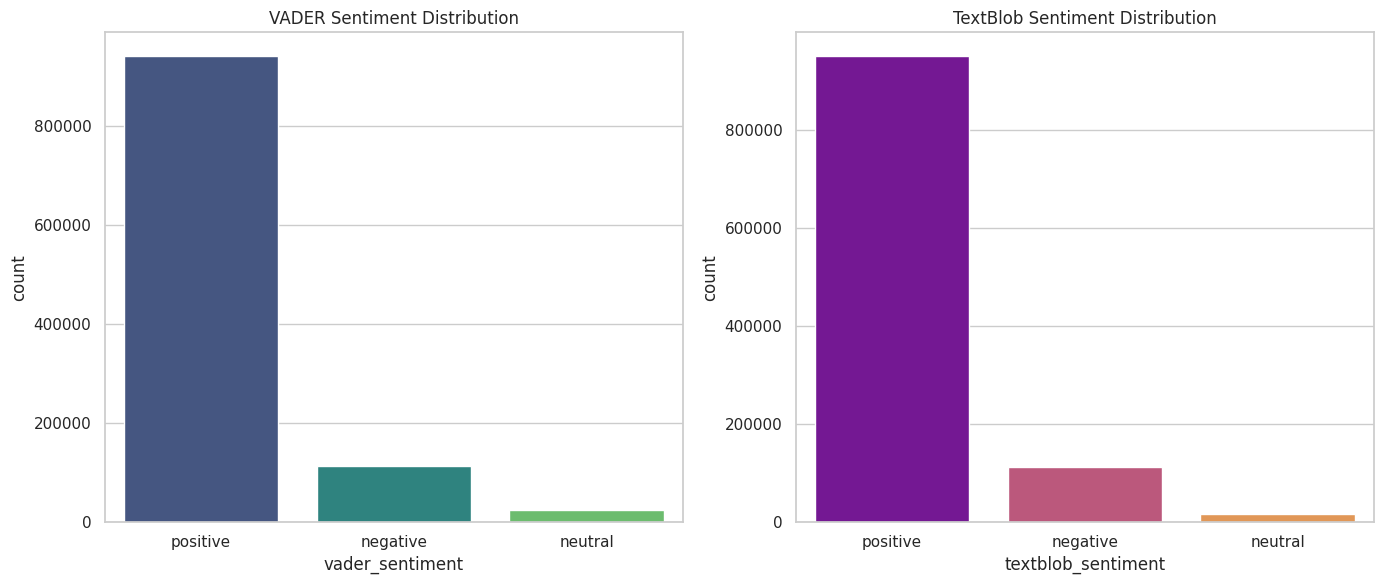

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# VADER sentiment distribution
sns.countplot(x='vader_sentiment', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('VADER Sentiment Distribution')

# TextBlob sentiment distribution
sns.countplot(x='textblob_sentiment', data=df, ax=axes[1], palette='plasma')
axes[1].set_title('TextBlob Sentiment Distribution')

# Show plots
plt.tight_layout()
plt.show()